## JURNAL MODUL 5 Perbaikan Kualitas Citra
Soal Nomor 1 :

1. Lakukan perbaikan citra pada gambar sunf_2.jpg dengan menggunakan window/kernel 3x3, 5x5 dan 7x7 dengan menerapkan proses filtering :

In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

Code di atas digunakan untuk

memanggil library cv2 dengan nama alias cv. Library ini digunakan untuk melakukan operasi dasar matriks 

memanggil fungsi pyplot library matplotlib dengan nama alias plt. Library ini digunakan untuk membaca gambar

memanggil library numpy dengan nama alias np. Library ini digunakan untuk membuat matriks

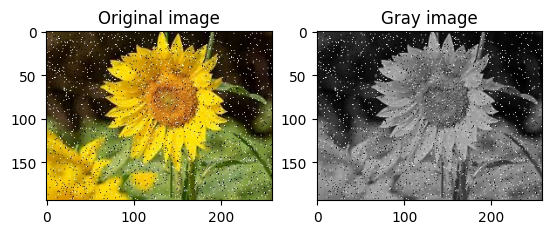

In [2]:
image = plt.imread("sunf_2.jpg") 
plt.subplot(121)
plt.title("Original image")
plt.imshow(image)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
plt.subplot(122)
plt.title("Gray image")
plt.imshow(gray, cmap="gray") 

Code di atas digunakan untuk:

Menggunakan fungsi imread dari plt untuk membaca citra yang akan diolah. kemudian disimpan di variabel image. Lalu menggunakan fungsi cvtColor dari cv untuk memuat gray scale dari citra dan menyimpannya di variabel gray. Dan terakhir menampilkan gambar gray dengan skala abu-abu

a. Mean

In [3]:
kernelm_3 = np.full((3,3), 1/9)

kernelm_5 = np.full((5,5), 1/25)

kernelm_7 = np.full((7,7), 1/49)

code di atas digunakan untuk membuat kernel full satu angka yang akan digunakan di dalam proses filtrasi menggunakan fungsi full. pada fungsi full akan menggunakan parameter berapa matriks kernelnya dan bilangan yang akan mengisinya

In [4]:
def filter(image, kernel):
    # mengambil nilai shape dari variabel image dan kernel
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    # melakukan perhitungan untuk mencari nilai tengah
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    # proses padding
    # padding mode yang digunakan adalah nearest
    # mode edge akan mengikutii nilai yang ada di pinggirnya
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             helper = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     helper += image[i+k, j+l] * kernel[k, l]
             result[i, j] = helper
    return result


Code diatas merupakan fungsi filter yang akan digunakan untuk memfiltrasi dengan mean filterring

pada fungsi ini akan langsung otomatis menambahkan paddding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses mencari mean dari piksel-piksel sesuai kernel yang akan digunakan. untuk mean filterring tidak ada bedanya dengan proses konvolusi biasa hanya saja yang membedakan kernal yang akan dipakai.

In [5]:
mean_3 = filter(gray, kernelm_3)
mean_5 = filter(gray, kernelm_5)
mean_7 = filter(gray, kernelm_7)

Code diatas mendeklarasikan variabel mean_3, mean_5 dan mean_7 dan langsung diisi dengan fungsi filter dengan parameter citra gray dan kernel masing-masing sesuai matriksnya (kernel_3, kernel_5, dan kernel_7) 

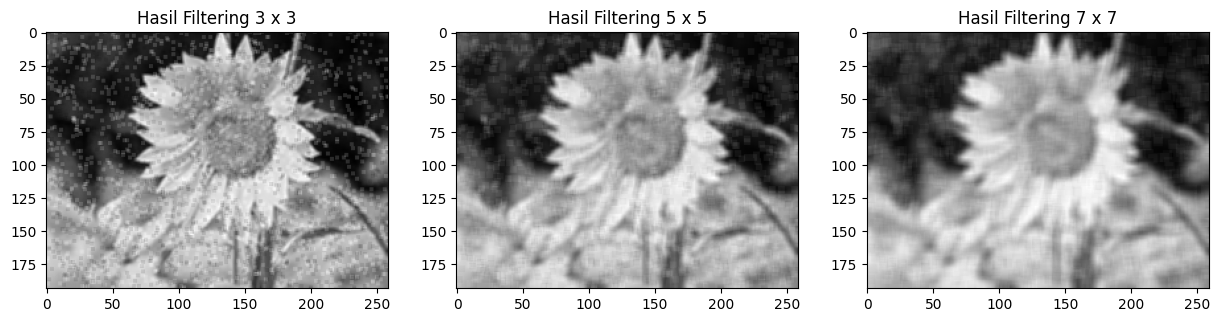

In [6]:
fig, ax= plt.subplots(1,3, figsize=(15,15))
ax[0].set_title('Hasil Filtering 3 x 3')
ax[0].imshow(mean_3, cmap='gray')
ax[1].set_title('Hasil Filtering 5 x 5')
ax[1].imshow(mean_5, cmap='gray')
ax[2].set_title('Hasil Filtering 7 x 7')
ax[2].imshow(mean_7, cmap='gray')

Code di atas digunakan untuk menampilkan ketiga citra yang telah difilter dengan fungsi subplot

b. Median

In [7]:
kernelmd_3 = np.full((3,3), 0)

kernelmd_5 = np.full((5,5), 0)

kernelmd_7 = np.full((7,7), 0)

code di atas digunakan untuk membuat kernel full satu angka yang akan digunakan di dalam proses filtrasi menggunakan fungsi full. pada fungsi full akan menggunakan parameter berapa matriks kernelnya dan bilangan yang akan mengisinya. namun kernel disini berbeda dengan kernel pada mean karena kernel disini hanya sebagai pembantu untuk melakukan pergeseran.

In [8]:
def median(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]
        
    return median

code di atas merupakan fungsi median digunakan untuk mencari nilai tengah pada citra yang telah dibagi oleh kernel. sebelum mencari nilai tengah diperlukan fungsi sorted untuk mengurutkan data pada array yang akan dipakai.

In [9]:
def filterm(image, kernel):
    # mengambil nilai shape dari variabel image dan kernel
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    # melakukan perhitungan untuk mencari nilai tengah
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    # proses padding
    # padding mode yang digunakan adalah nearest
    # mode edge akan mengikutii nilai yang ada di pinggirnya
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = median(temp)
             
    return result


Code diatas merupakan fungsi filter yang akan digunakan untuk memfiltrasi dengan mean filterring

pada fungsi ini akan langsung otomatis menambahkan paddding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan median dari data yang diambil dari piksel piksel sesuai kernel yang akan digunakan. untuk proses pencarian median ada hanya dengan memanggil fungsi median() pada fungsi ini.

In [10]:
median_3 = filterm(gray, kernelmd_3)
median_5 = filterm(gray, kernelmd_5)
median_7 = filterm(gray, kernelmd_7)

Code diatas mendeklarasikan variabel median_3, median_5 dan median_7 dan langsung diisi dengan fungsi filter dengan parameter citra gray dan kernel masing-masing sesuai matriksnya (kernelmd_3, kernelmd_5, dan kernelmd_7) 

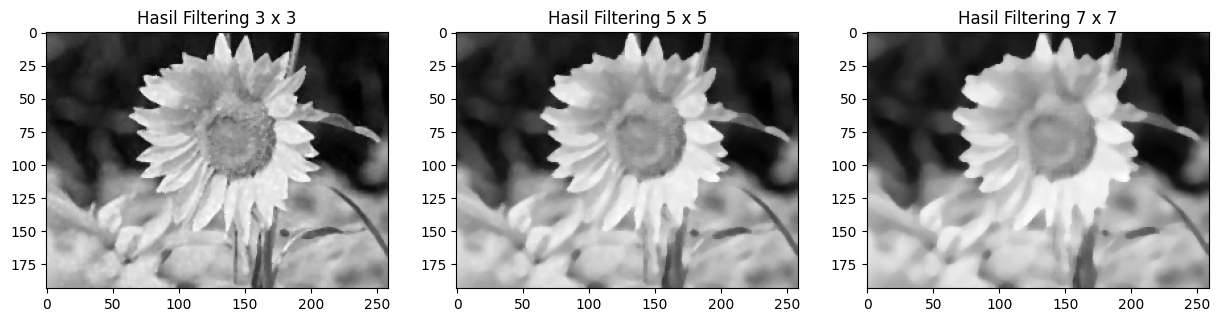

In [11]:
fig, ax= plt.subplots(1,3, figsize=(15,15))
ax[0].set_title('Hasil Filtering 3 x 3')
ax[0].imshow(median_3, cmap='gray')
ax[1].set_title('Hasil Filtering 5 x 5')
ax[1].imshow(median_5, cmap='gray')
ax[2].set_title('Hasil Filtering 7 x 7')
ax[2].imshow(median_7, cmap='gray')

Code di atas digunakan untuk menampilkan ketiga citra yang telah difilter dengan fungsi subplot

c. Modus

In [12]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

code di atas merupakan fungsi modus() yang digunakan untuk mencari modus (angka dengan frekuensi terbanyak) pada data array. pencarian nilai modus ini dilakukan dengan cara memanfaatkan fungsi lopping yang akan terus menambah angka pada variabel count jika data array memeiliki nilai piksel yang sama.

In [13]:
def filtermd(image, kernel):
    # mengambil nilai shape dari variabel image dan kernel
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    # melakukan perhitungan untuk mencari nilai tengah
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    # proses padding
    # padding mode yang digunakan adalah nearest
    # mode edge akan mengikutii nilai yang ada di pinggirnya
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    # proses konvolusi
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = modus(temp)
             
    return result

Code diatas merupakan fungsi filter yang akan digunakan untuk memfiltrasi dengan mean filterring

pada fungsi ini akan langsung otomatis menambahkan paddding ke dalam citra untuk membantu proses konvolusi yang akan berjalan untuk proses peletakan modus dari data yang diambil dari piksel-piksel sesuai kernel yang akan digunakan. untuk proses pencarian modus ada hanya dengan memanggil fungsi modus pada fungsi ini.

In [14]:
modus_3 = filtermd(gray, kernelmd_3)
modus_5 = filtermd(gray, kernelmd_5)
modus_7 = filtermd(gray, kernelmd_7)

Code diatas mendeklarasikan variabel modus_3, modus_5 dan modus_7 dan langsung diisi dengan fungsi filter dengan parameter citra gray dan kernel masing-masing sesuai matriksnya (kernelmd_3, kernelmd_5, dan kernelmd_7) 

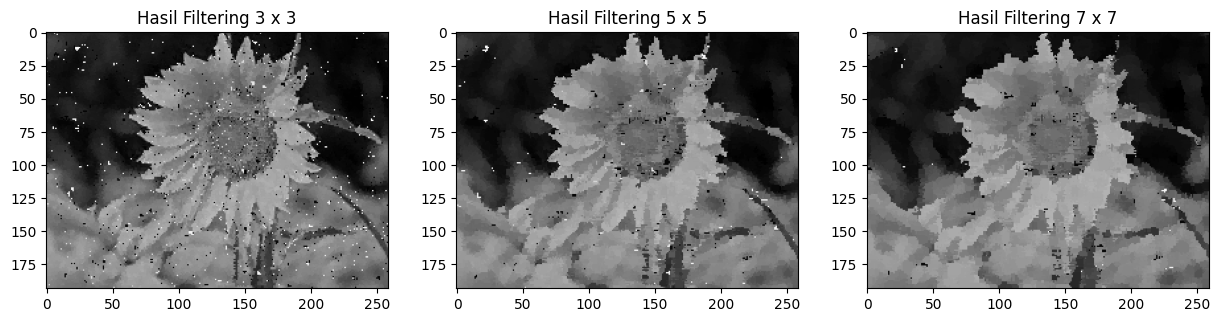

In [15]:
fig, ax= plt.subplots(1,3, figsize=(15,15))
ax[0].set_title('Hasil Filtering 3 x 3')
ax[0].imshow(modus_3, cmap='gray')
ax[1].set_title('Hasil Filtering 5 x 5')
ax[1].imshow(modus_5, cmap='gray')
ax[2].set_title('Hasil Filtering 7 x 7')
ax[2].imshow(modus_7, cmap='gray')

Code di atas digunakan untuk menampilkan ketiga citra yang telah difilter dengan fungsi subplot